<a href="https://www.kaggle.com/code/mikedelong/python-load-and-scatter-with-plotly?scriptVersionId=141652000" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df = pd.read_excel(io='/kaggle/input/diamonds/Diamonds.xlsx', sheet_name='Sheet1', index_col='diamond_id', 
                   parse_dates=['date'],
                  )
df.head()

,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,symmetry,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
diamond_id,,,,,,,,,,,,,,,,,,,,,
131328926,Cushion,5.57,J,Blue,Orange,Pinkish,Fancy Dark,VVS1,Poor,Very Good,...,M,VTK,SL,Blue,Blue,Faint,GIA,684153,E1,2014-12-22
131704776,Cushion,0.42,K,Pink,Orange,Yellowish,Fancy Vivid,SI1,Excellent,Very Good,...,VTN,VTK,N,White,Green,Slight,HRD,1276836,Yes,2020-12-01
131584417,Marquise,0.84,I,Black,Pink,Yellowish,Fancy Vivid,SI3,Fair,Very Good,...,TN,STK,EL,Orange,White,Very Strong,HRD,1274951,No,2013-06-13
131584416,Pear,17.26,K,Pink,Purple,Orangey,Very Light,I2,Very Good,Good,...,STN,TK,L,Green,Yellow,Very Strong,GIA,480725,Yes,2022-08-16
131613644,Princess,2.32,K,Orange,Purple,Yellowish,Fancy Light,VS2,Very Good,Fair,...,TK,VTK,N,White,Blue,Very Strong,IGI,1273331,No,2005-03-02


In [2]:
df.nunique()

shape                              11
size                             1927
color                              10
fancy_color_dominant_color         12
fancy_color_secondary_color        12
fancy_color_overtone                7
fancy_color_intensity               9
clarity                            11
cut                                 5
symmetry                            5
polish                              5
depth_percent                     100
table_percent                      95
meas_length                      1422
meas_width                       1422
meas_depth                       1422
girdle_min                          9
girdle_max                          9
culet_size                          8
culet_condition                     5
fluor_color                         5
fluor_intensity                     6
lab                                 3
total_sales_price              203793
eye_clean                           4
date                             6939
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219704 entries, 131328926 to 129630500
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   shape                        219704 non-null  object        
 1   size                         219704 non-null  float64       
 2   color                        219704 non-null  object        
 3   fancy_color_dominant_color   219704 non-null  object        
 4   fancy_color_secondary_color  219704 non-null  object        
 5   fancy_color_overtone         219704 non-null  object        
 6   fancy_color_intensity        219704 non-null  object        
 7   clarity                      219704 non-null  object        
 8   cut                          219704 non-null  object        
 9   symmetry                     219704 non-null  object        
 10  polish                       219704 non-null  object        
 11  depth_percent       

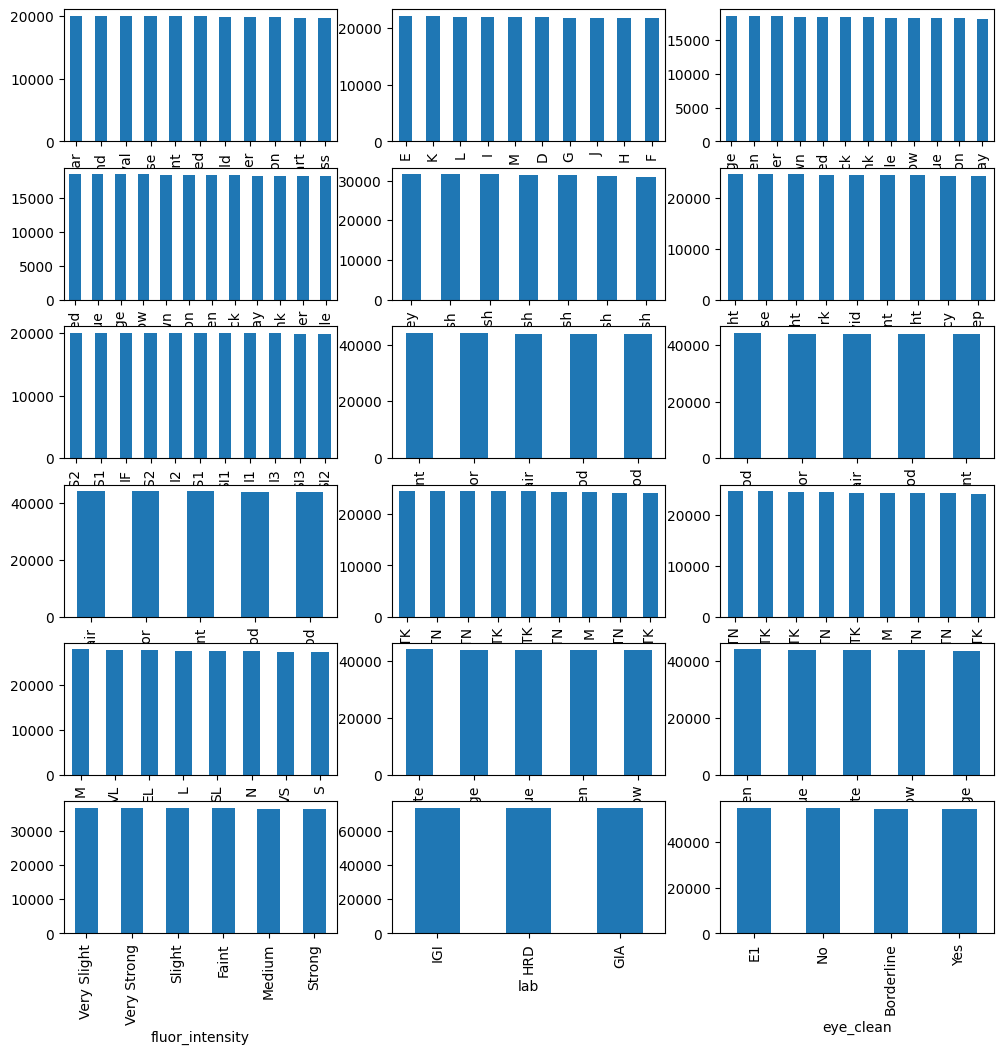

In [4]:
from matplotlib.pyplot import subplots
_, ax = subplots(figsize=(12, 12), ncols=3, nrows=6)
for index, column in enumerate([item for item, value in df.nunique().items() if value <= 12]):
    df[column].value_counts().plot(ax=ax.ravel()[index], kind='bar')

Maybe just maybe this is synthetic data. It's hard to say, but it's odd that all these columns are essentially the same size.

In [5]:
from plotly.express import scatter
scatter(data_frame=df.sample(1000), x='meas_length', y='meas_width', color='total_sales_price').show()

Wow that looks random.

In [6]:
df['total_sales_price'].sum()

159222547028

Wow $159 billion is a lot. 

<Axes: ylabel='Frequency'>

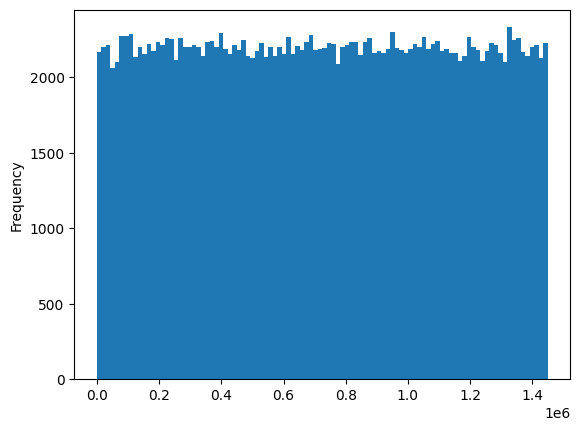

In [7]:
df['total_sales_price'].plot.hist(bins=100)